In [1]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten
from tensorflow.keras.preprocessing import sequence

In [2]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=5000)

17464789/17464789 [==============================] - 0s 0us/step


In [3]:
# Pad the sequences to the same length
X_train = sequence.pad_sequences(X_train, maxlen=250)  # Reduced sequence length
X_test = sequence.pad_sequences(X_test, maxlen=250)  # Reduced sequence length

In [6]:
model = Sequential([
    Embedding(5000, 32, input_length=250),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [9]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 250, 32)           160000    
                                                                 
 flatten (Flatten)           (None, 8000)              0         
                                                                 
 dense (Dense)               (None, 128)               1024128   
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1184257 (4.52 MB)
Trainable params: 1184257 (4.52 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=64, verbose=1)

Epoch 1/10
391/391 [==============================] - 10s 23ms/step - loss: 0.2563 - accuracy: 0.8952
Epoch 2/10
391/391 [==============================] - 9s 22ms/step - loss: 0.0813 - accuracy: 0.9732
Epoch 3/10
391/391 [==============================] - 9s 24ms/step - loss: 0.0154 - accuracy: 0.9971
Epoch 4/10
391/391 [==============================] - 9s 23ms/step - loss: 0.0023 - accuracy: 0.9999
Epoch 5/10
391/391 [==============================] - 8s 21ms/step - loss: 6.5625e-04 - accuracy: 1.0000
Epoch 6/10
391/391 [==============================] - 9s 23ms/step - loss: 2.9149e-04 - accuracy: 1.0000
Epoch 7/10
391/391 [==============================] - 9s 23ms/step - loss: 1.8878e-04 - accuracy: 1.0000
Epoch 8/10
391/391 [==============================] - 8s 20ms/step - loss: 1.3122e-04 - accuracy: 1.0000
Epoch 9/10
391/391 [==============================] - 9s 24ms/step - loss: 9.4174e-05 - accuracy: 1.0000
Epoch 10/10
391/391 [==============================] - 9s 23ms/step - 

In [11]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Accuracy: %.2f%%" % (accuracy*100))

782/782 [==============================] - 4s 5ms/step - loss: 0.7430 - accuracy: 0.8599
Accuracy: 85.99%


782/782 [==============================] - 3s 4ms/step


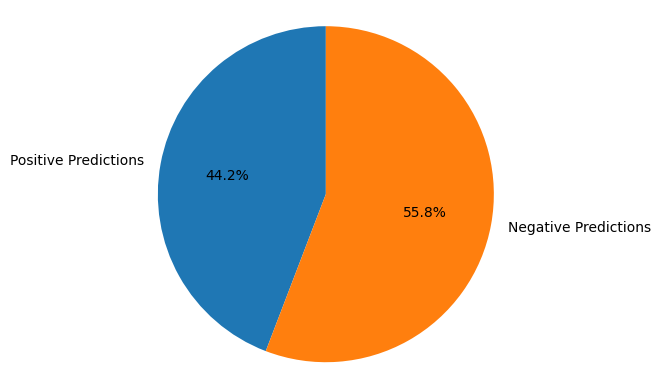

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Generate predictions
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.92).astype(int)  # Convert probabilities to class labels

# Count positive and negative predictions
positive_predictions = np.sum(y_pred)
negative_predictions = len(y_pred) - positive_predictions

# Plot the pie chart
labels = 'Positive Predictions', 'Negative Predictions'
sizes = [positive_predictions, negative_predictions]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()